# Laboration 2 - Numerisk beräkning av integraler

## Inledning

Ibland kan man inte bestämma integraler exakt utan man får nöja sig med att beräkna approximationer. Till exempel $\int_0^1 e^{x^2} dx $ beräknas lämpligtvis med numeriska approximationer eftersom den primitiva funktionen till $e^{x^2}$ inte kan uttryckas i termer av [elementära funktioner](https://en.wikipedia.org/wiki/Elementary_function). Det kan också vara så att integranden bara är känd i vissa punkter, t.ex. om vi har en serie med mätdata.


## Beräkningsmetoder

Den geometriska tolkningen av integralen $\int_a^b f(x)\ dx$ är som arean av ytan mellan grafen av integranden, $y=f(x)$, och $x$-axeln, $y = 0$, för $x$ mellan $x = a$ och $x = b$.

<center><img src="https://canvas.gu.se/files/5105261/download?download_frd=1"></center>

Vi gör en likformig indelning av intervallet $a \leq x \leq b$,
$$a = x_0 < x_1 < x_2 < \dots < x_{n−1} < x_n = b$$
så att vi får $n$ lika långa delintervall $x_{i−1} ≤ x ≤ x_i$ med bredden $h =
\frac{b−a}{n}$.
Sedan delar vi upp integralen i en summa av delintegraler över varje delintervall
$$\int^b_a f(x)\ dx =
\sum^n_{i=1} \int^{x_i}_{x_{i−1}} f(x)\ dx.$$

<center><img src="https://canvas.gu.se/files/5105262/download?download_frd=1"></center>

Om vi approximerar $f(x)$ med $f(x_{i−1})$ i intervallen $x_{i−1} ≤ x ≤ x_i$
får vi **vänster rektangelregel**
$$\int^b_a f(x)\ dx ≈ \sum^n_{i=1} h f(x_{i−1}).$$

<center><img src="https://canvas.gu.se/files/5105263/download?download_frd=1"></center>

Om vi approximerar $f(x)$ med $f(x_i)$ i intervallen $x_{i−1} ≤ x ≤ x_i$
får vi **höger rektangelregel**
$$\int^b_a f(x)\ dx ≈ \sum^n_{i=1} h f(x_i).$$

<center><img src="https://canvas.gu.se/files/5105264/download?download_frd=1"></center>

Om vi approximerar $f(x)$ med $f(m_i)$ i intervallen $x_{i−1} ≤ x ≤ x_i$, där $m_i$ är mittpukterna i intervallen, får vi **mittpunktsmetoden** 
$$\int^b_a f(x)\ dx ≈ \sum^n_{i=1} h f\left(\frac{x_{i−1} + x_i}{2}\right).$$

<center><img src="https://canvas.gu.se/files/5105265/download?download_frd=1"></center>

I Persson-Böiers kapitel 6.2 beskrivs hur integralen $\int^b_a f(x)\ dx$ kan approximeras med hjälp av Riemannsummor
$\sum^n_{i=1} f(c_i) h_i$. Metoderna ovan är olika varianter av Riemannsummor, med $c_i = x_{i−1}$, $c_i = x_i$ respektive $c_i = m_i$, och $h_i = h$.

Vi kan också approximera integralen med medelvärdet av vänster och höger rektangelregel och
får då **trapetsmetoden**
$$\int^b_a f(x)\ dx ≈ \sum^n_{i=1} \frac{h}{2}(f(x_{i−1}) + f(x_i)).$$

<center><img src="https://canvas.gu.se/files/5105266/download?download_frd=1"></center>

Antag att vi vill beräkna $\int^1_0 x \sin(x)\ dx$ med vänster rektangelregel med $n = 100$. Vi skulle kunna
göra så här

In [2]:
from math import sin

n=100
f=lambda x : x*sin(x)
a=0
b=1
h=(b-a)/n
I=0
for i in range(0,n):
    x=a+i*h
    I=I+h*f(x)
print(I)

0.29697283883570513


Att använda en for-sats är oftast inte effektivt för beräkningar med många upprepningar. Vi bildar hellre en vektor av alla funktionsvärdena $f(x_i)$ och summerar sedan dessa enligt


In [3]:
import numpy as np

n=100
f=lambda x : x*np.sin(x)
a=0
b=1
x=np.linspace(a,b,n+1)
h=(b-a)/n
I=np.sum(h*f(x[0:n]))
print(I)

0.29697283883570524


Detta sätt att organisera en beräkning kallas att vektorisera den, dvs. man bildar först en eller
flera vektorer och utför sedan den önskade beräkningen på dem. I Python görs detta lämpligen med ``ndarray`` från NumPy (se [Funktioner i Python, grafritning och numeriska beräkningar](https://canvas.gu.se/courses/45909/pages/funktioner-i-python-grafritning-och-numeriska-berakningar/)), där de elementvisa operationerna
`+`,`*`,`/`,`**` såväl som andra [matematiska funktioner](https://numpy.org/doc/stable/reference/routines.math.html) som t.ex. `numpy.sin` är exempel på vektoriserade operationer. I exemplet ovan används även funktionen `numpy.sum` som snabbt summerar elementen i en ``ndarray``.


**Uppgift 1** Beräkna en approximation av integralen $\int^1_0
x \sin(x) dx$ med vänster och höger rektangelregel samt mittpunkts- och trapetsmetoderna. Använd `numpy.sum`.

vänster Integral =  0.29697283883570524
höger Integral =  0.3053875486837842
Mittpunktsmetoden Integral =  0.30116292151380075
Trapezoid area T:  0.30118019375974475


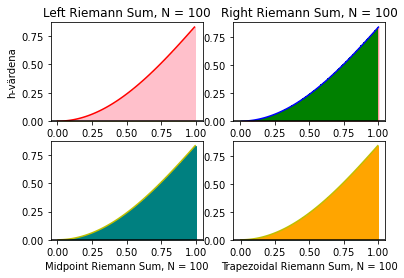

In [8]:

import matplotlib.pyplot as plt
import numpy as np
#import sympy as sy


f = lambda x:x*np.sin(x)

def calculate_dx (a, b, n):
	return (b-a)/float(n)

def leftEndPoint_rektangelregel(a,b,f,n): 
    """ over-estimation """
    h = calculate_dx(a,b,n) 
    x = np.linspace(a,b-h,n) #x_left
    
    I = np.sum(h*f(x[0:n]) )
    print('vänster Integral = ', I)
      
    plt.subplot(2,2,1) # Skapa 4 fönster (2 rader och 2 kolumner) och aktivera första
    
    plt.title('Left Riemann Sum, N = {}'.format(n))
    plt.ylabel('h-värdena') # Text längs y-axeln
    plt.xlabel(' ')
    
    
    plt.plot(x,f(x), 'r',markersize=10)
    plt.bar(x,f(x),width = h ,color='pink',align='edge')
    
    plt.axhline(color ='black')
    plt.fill_between(x, f(x),
                     where = [(x >= a) and (x <= b) for x in x],
                     color='yellow', alpha = 0.3 )
      
leftEndPoint_rektangelregel(0,1,f,100)
    
def Hoger_rektangelregel(a,b,f,n): 
    """ under-estimation """
    h = calculate_dx(a,b,n)
    x = np.linspace(h,b,n) #x_right
   
    I = np.sum(h*f(x[0:n]))
    print('höger Integral = ', I)
    
    plt.subplot(2,2,2) # Aktivera andra fönstret
    
    plt.title('Right Riemann Sum, N = {}'.format(n))
    plt.xlabel(' ')
    
    plt.plot(x,f(x),'b',markersize=10)
    plt.bar(x,f(x),width =-h, color='green',align='edge')   # width = (b-a)/n = h = calculate_dx
    
    plt.axhline(color ='black')
    plt.fill_between(x, f(x),
                     where = [(x >= a) and (x <= b) for x in x],
                     color='red', alpha = 0.3 )
    
Hoger_rektangelregel(0,1,f,100)

def Mittpunkts_metoden(a,b,f,n):

    h = calculate_dx(a,b,n)
    x = np.linspace(h/2,b-h/2,n) #Domain from a to b
    
    I = np.sum(f(x) * h)
    print('Mittpunktsmetoden Integral = ', I)
    
    plt.subplot(2,2,3) # Aktivera andra fönstret
    plt.title('\n\n\n\n')
    plt.xlabel('Midpoint Riemann Sum, N = {}'.format(n))
    
    plt.plot(x,f(x),'y',markersize=10)
    plt.bar(x,f(x),width = h,color='teal',edgecolor='teal')
    
    plt.axhline(color ='black')
    plt.fill_between(x, f(x),
                     where = [(x >= a) and (x <= b) for x in x],
                     color='teal', alpha = 0.3 )
    
Mittpunkts_metoden(0,1,f,100)

def Trapezoidal(a,b,f,n):
    
    x = np.linspace(a,b,n+1) # N+1 points make N subintervals
    y = f(x)
    
    y_right = y[1:] # right endpoints array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])
    y_left = y[:-1] # left endpoints array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
    
    dx = calculate_dx(a,b,n) 
    T = (dx/2) * np.sum(y_right + y_left)
    #return T
    print("Trapezoid area T: ", T)
    
    x = np.linspace(a,b,n)
    plt.subplot(2,2,4) # Aktivera andra fönstret
    plt.title('\n\n\n\n')
    plt.xlabel('Trapezoidal Riemann Sum, N = {}'.format(n))
    
    plt.plot(x,f(x),'y',markersize=10)
    plt.bar(x,f(x),width=dx,color='Orange',edgecolor='Orange')
    plt.axhline(color ='black')
    plt.fill_between(x, f(x),
                     where = [(x >= a) and (x <= b) for x in x],
                     color='teal', alpha = 0.3 )
    
Trapezoidal(0,1,f,100)
# Skriv din kod här (eller i Spyder).


**Uppgift 2**. Skriv en funktion med namnet `min_integral` som beräknar integralen $\int^a_b f(x)\ dx$ approximativt. Funktionen skall ha anropet `q=min_integral(f,a,b,n,k)`, där `n` ger antal delintervall (steglängden ges av $h = (b − a)/n$) och `k` ger metoden som skall användas ($k = 1, 2, 3, 4$
ger vänster och höger rektangelregel, mittpunkts- och trapetsmetoderna respektive).


In [7]:
import matplotlib.pyplot as plt
import numpy as np
def calculate_dx (a, b, n):
	return (b-a)/float(n)
F = lambda x: x

def min_integral(f,a,b,n,k):
    dx = calculate_dx(a,b,n)
    #x = np.linspace(a,b,n+1)
    
    if k == 1: #left
        x = np.linspace(a,b-dx,n) #x_left
        x_left = x[:-1]
        print("Left -Approximation- : ",np.sum(f(x_left)*dx))
    elif k == 2: #right
        x = np.linspace(dx,b,n) #x_right
        x_right = x[1:]
        print("Right -Approximation-  : ",np.sum(f(x_right)*dx) )
    elif k == 3: # midpunkts
        x = np.linspace(dx/2,b-dx/2,n)
        x_mid = (x[:-1] + x[1:])/2
        print("Midpunkts -Approximation-  : ", np.sum(f(x_mid)*dx) )
    elif k == 4: #trapeziodal
        x = np.linspace(a,b,n+1) # N+1 points make N subintervals
        y = f(x)
        y_right = y[1:] # right endpoints 
        y_left = y[:-1] # left endpoints
        print("Trapeziodal -Approximation-  : ", (dx/2) * np.sum(y_right + y_left) )
    else:
        raise ValueError("Method must be 'left', 'right' or 'midpoint'.")

print("===================== uppgift 2 ============================")
min_integral(F,a=0,b=2,n=10,k=1) # left
min_integral(F,a=0,b=2,n=10,k=2) # right
min_integral(F,a=0,b=2,n=10,k=3) # mid
min_integral(F,a=0,b=2,n=10,k=4) # trapeziodal
print("============================================================")


===================== uppgift 2 ============================
Left -Approximation- :  1.4400000000000002
Right -Approximation-  :  2.16
Midpunkts -Approximation-  :  1.7999999999999998
Trapeziodal -Approximation-  :  2.0000000000000004


**Uppgift 3**. Testa ditt program på följande integraler. Variera metodval och antal delintervall $n$.

a. $\int_0^1 e^{-x^2}\ dx $

b. $\int_{-1}^1 \frac{1}{1+x^2}\ dx$

c. $\int_0^1 \tan (\sqrt{x})\ dx$


In [14]:
# Skriv din kod här (eller i Spyder).

F_1 = lambda x:np.exp(-x**2)
F_b = lambda x: 1/(1+x**2)
F_c = lambda x: np.tan(x**0.5)

print("===================== uppgift 3 ============================")
def min_integral_upp3(f,a,b,n,k):
    dx = calculate_dx(a,b,n)
    #x = np.linspace(a,b,n+1)
    
    if k == 1: #left
        x = np.linspace(a,b-dx,n) #x_left
        x_left = x[:-1]
        
        #return np.sum(f(x_left)*dx)
        print("Left -uppgift_3a : ",np.sum(f(x_left)*dx))
    elif k == 2: #right
        x = np.linspace(dx,b,n) #x_right
        x_right = x[1:]
        #return np.sum(f(x_right)*dx)
        print("Right_uppgift_3a : ",np.sum(f(x_right)*dx) )
    elif k == 3: # midpunkts
        x = np.linspace(dx/2,b-dx/2,n)
        x_mid = (x[:-1] + x[1:])/2
        #return np.sum(f(x_mid)*dx)
        print("Midpunkts_uppgift_3a : ", np.sum(f(x_mid)*dx) )
    elif k == 4: #trapeziodal
        x = np.linspace(a,b,n+1) # N+1 points make N subintervals
        y = f(x)
        y_right = y[1:] # right endpoints 
        y_left = y[:-1] # left endpoints
        #return (dx/2) * np.sum(y_right + y_left)
        print("Trapeziodal_uppgift_3a  : ", (dx/2) * np.sum(y_right + y_left) )
    else:
        raise ValueError("Method must be 'left', 'right' or 'midpoint'.")
min_integral_upp3(F_1,a=0,b=1,n=10,k=1) # left
min_integral_upp3(F_1,a=0,b=1,n=10,k=2) # right
min_integral_upp3(F_1,a=0,b=1,n=10,k=3) # mid
min_integral_upp3(F_1,a=0,b=1,n=10,k=4) # trapeziodal"""
print("==========================================================")

print("==========================================================")
F_b = lambda x: 1/(1+x**2)
def min_integral_upp3_b(f,a,b,n,k):
    dx = calculate_dx(a,b,n)
    #x = np.linspace(a,b,n+1)
    
    if k == 1: #left
        x = np.linspace(a,b-dx,n) #x_left
        x_left = x[:-1]
        
        #return np.sum(f(x_left)*dx)
        print("Left_upp_3b : ",np.sum(f(x_left)*dx))
    elif k == 2: #right
        x = np.linspace(dx,b,n) #x_right
        x_right = x[1:]
        #return np.sum(f(x_right)*dx)
        print("Right_upp_3b  : ",np.sum(f(x_right)*dx) )
    elif k == 3: # midpunkts
        x = np.linspace(dx/2,b-dx/2,n)
        x_mid = (x[:-1] + x[1:])/2
        #return np.sum(f(x_mid)*dx)
        print("Midpunkts_upp_3b  : ", np.sum(f(x_mid)*dx) )
    elif k == 4: #trapeziodal
        x = np.linspace(a,b,n+1) # N+1 points make N subintervals
        y = f(x)
        y_right = y[1:] # right endpoints 
        y_left = y[:-1] # left endpoints
        #return (dx/2) * np.sum(y_right + y_left)
        print("Trapeziodal_upp_3b  : ", (dx/2) * np.sum(y_right + y_left) )
    else:
        raise ValueError("Method must be 'left', 'right' or 'midpoint'.")
min_integral_upp3_b(F_b,a=-1,b=1,n=10,k=1) # left
min_integral_upp3_b(F_b,a=-1,b=1,n=10,k=2) # right
min_integral_upp3_b(F_b,a=-1,b=1,n=10,k=3) # mid
min_integral_upp3_b(F_b,a=-1,b=1,n=10,k=4) # trapeziodal
print("==========================================================")


print("==========================================================")
F_c = lambda x: np.tan(x**0.5)
def min_integral_upp3_c(f,a,b,n,k):
    dx = calculate_dx(a,b,n)
    #x = np.linspace(a,b,n+1)
    
    if k == 1: #left
        x = np.linspace(a,b-dx,n) #x_left
        x_left = x[:-1]
        
        #return np.sum(f(x_left)*dx)
        print("Left_upp_3c : ",np.sum(f(x_left)*dx))
    elif k == 2: #right
        x = np.linspace(dx,b,n) #x_right
        x_right = x[1:]
        #return np.sum(f(x_right)*dx)
        print("Right_upp_3c  : ",np.sum(f(x_right)*dx) )
    elif k == 3: # midpunkts
        x = np.linspace(dx/2,b-dx/2,n)
        x_mid = (x[:-1] + x[1:])/2
        #return np.sum(f(x_mid)*dx)
        print("Midpunkts_upp_3c  : ", np.sum(f(x_mid)*dx) )
    elif k == 4: #trapeziodal
        x = np.linspace(a,b,n+1) # N+1 points make N subintervals
        y = f(x)
        y_right = y[1:] # right endpoints 
        y_left = y[:-1] # left endpoints
        #return (dx/2) * np.sum(y_right + y_left)
        print("Trapeziodal_upp_3c  : ", (dx/2) * np.sum(y_right + y_left) )
    else:
        raise ValueError("Method must be 'left', 'right' or 'midpoint'.")
min_integral_upp3_c(F_c,a=0,b=1,n=10,k=1) # left
min_integral_upp3_c(F_c,a=0,b=1,n=10,k=2) # right
min_integral_upp3_c(F_c,a=0,b=1,n=10,k=3) # mid
min_integral_upp3_c(F_c,a=0,b=1,n=10,k=4) # trapeziodal
print("==========================================================")

===================== uppgift 3 ============================
Left -uppgift_3a :  0.7333310174508831
Right_uppgift_3a :  0.6155997848154048
Midpunkts_uppgift_3a :  0.6778168240731774
Trapeziodal_uppgift_3a  :  0.7462107961317495
Left_upp_3b :  1.4455118373932998
Right_upp_3b  :  1.276659928915536
Midpunkts_upp_3b  :  1.4248409423153539
Trapeziodal_upp_3b  :  1.567463056905495
Left_upp_3c :  0.6336826471909022
Right_upp_3c  :  0.8961524341819127
Midpunkts_upp_3c  :  0.7731324732782575
Trapeziodal_upp_3c  :  0.8510028595110027


## Konvergens

För metoderna ovan gäller att samtliga är konvergenta, dvs. låter vi antal delintervall $n$ gå mot oändligheten så går approximationerna mot integralens värde (om integranden är kontinuerlig). Vi illustrerar detta med några bilder för vänster rektangelregel där $n$ blir allt större.

<center><img src="https://canvas.gu.se/files/5105267/download?download_frd=1"></center>

<center><img src="https://canvas.gu.se/files/5105268/download?download_frd=1"></center>

<center><img src="https://canvas.gu.se/files/5105269/download?download_frd=1"></center>

Vi ser att vi allt bättre täcker upp ytan under grafen med allt fler och smalare staplar.
För användbara beräkningar behövs inte bara konvergens, utan man vill uppnå en bra approximation utan att behöva ta $n$ alltför stort, dels för att beräkningen inte skall kräva för mycket tid eller datorkapacitet, och dels för att med stora $n$ spelar avrundningsfel i numeriska beräkningar större roll.
För vänster och höger rektangelregel gäller att felet beror högst linjärt på steglängden, dvs. om vi fördubblar antal delintervall så kan man vänta sig att felet halveras i approximationen av integralen. För mittpunkts- och trapetsmetoderna beror felet högst kvadratiskt på steglängden, dvs. vid fördubbling av antalet delintervall så kan man vänta sig att felet minskar med en faktor fyra.

**Uppgift 4** Vi betraktar integralen $\int^1_0 x \sin(x)\ dx$ igen. Beräkna integralen exakt (för hand). Jämför exakt värde med de approximationer vi får med metoderna ovan för olika antal delintervall $n$. Hur stort blir felet? Tag t.ex först $n = 50$ och sedan $n = 100$, beräkna felen i approximationerna och se efter hur felen förändras.

In [153]:
# Skriv din kod här (eller i Spyder).